In [3]:
!pip install ultralytics  
!pip uninstall keras tensorflow -y
!pip install tensorflow==2.11.0  # or another version you need
!pip install -U albumentations

Found existing installation: keras 2.11.0
Uninstalling keras-2.11.0:
  Successfully uninstalled keras-2.11.0
Found existing installation: tensorflow 2.11.0
Uninstalling tensorflow-2.11.0:
  Successfully uninstalled tensorflow-2.11.0
You can safely remove it manually.
You can safely remove it manually.
You can safely remove it manually.
You can safely remove it manually.
You can safely remove it manually.
You can safely remove it manually.
You can safely remove it manually.
You can safely remove it manually.
You can safely remove it manually.
  Using cached tensorflow-2.11.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.1 kB)
  Using cached keras-2.11.0-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached protobuf-3.19.6-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (787 bytes)
  Using cached tensorboard-2.11.2-py3-none-any.whl.metadata (1.9 kB)
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached go

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Gl0zlyT6BgJmOOZkGj4Y")
project = rf.workspace("manchado53").project("keypoint-msoe")
version = project.version(6)
dataset = version.download("yolov8")
                

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to keypoint-msoe-6 in yolov8:: 100%|██████████| 376/376 [00:00<00:00, 390.19it/s]


/home/manchadoa/.local/lib/python3.8/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 2.0.8 (you have 1.4.18). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


WARNING ⚠️ /home/manchadoa/TheScript/runs/pose/train18/weights/best.pt appears to require 'dill', which is not in Ultralytics requirements.
AutoInstall will run now for 'dill' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official Ultralytics model, i.e. 'yolo predict model=yolo11n.pt'
requirements: Ultralytics requirement ['dill'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 2.9s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect

(720, 1280, 3)
(2160, 3840, 3)

0: 384x640 (no detections), 241.1ms
Speed: 5.0ms preprocess, 241.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


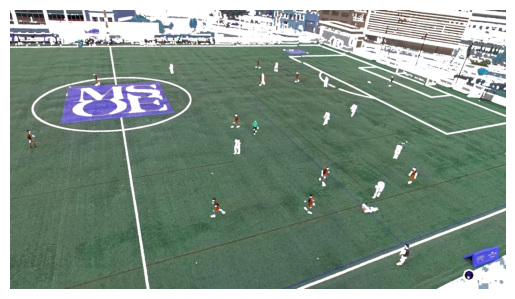

error: OpenCV(4.10.0) /io/opencv/modules/highgui/src/window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


In [1]:
import sys, os
sys.path.insert(0, os.path.join(os.pardir, "src"))

import cv2
import numpy as np
from keypoint_model import KeypointModel
from constants import path_model
from soccer_util_last import load_and_preprocess_image_and_coords_lines
import matplotlib.pyplot as plt

cap = cv2.VideoCapture('/data/ai_club/SoccerStats2024/30SecondsAurora.mp4')
model = KeypointModel()
model.load(path_model)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame_input, _ = load_and_preprocess_image_and_coords_lines(frame)
    print(frame_input.shape)
    print(frame.shape)
    predictions = model.predict(frame_input)
    boxes = predictions[0].boxes.xyxy.cpu().numpy()  # (N, 4)
    classes = predictions[0].boxes.cls.cpu().numpy()  # (N,)
    scores = predictions[0].boxes.conf.cpu().numpy()  # (N,)

    for box, cls, score in zip(boxes, classes, scores):
        x1, y1, x2, y2 = map(int, box)
        # label = f"{class_names[int(cls)]}: {score:.2f}" if class_names else f"Class {int(cls)}: {score:.2f}"
        color = (0, 255, 0)  # Green, or pick a color per class
        cv2.rectangle(frame_input, (x1, y1), (x2, y2), color, 2)
        cv2.putText(frame_input, f"{cls}: {score:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    keypoints = predictions[0].keypoints.xy.cpu().numpy()
    keypoints = keypoints.reshape(-1, 2)
    for keypoint in keypoints:
        print(keypoint)
        x, y = map(int, keypoint)
        cv2.circle(frame_input, (x, y), 5, (0, 0, 255), -1)

    plt.imshow(cv2.cvtColor(frame_input, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    break
cap.release()
cv2.destroyAllWindows()


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Gl0zlyT6BgJmOOZkGj4Y")
project = rf.workspace("manchado53").project("keypoint-msoe")
version = project.version(3)
dataset = version.download("yolov8")
                

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to keypoint-msoe-3 in yolov8:: 100%|██████████| 386/386 [00:00<00:00, 404.23it/s]
